In [2]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [8]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_ann"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['.PMIP3_1pctCO2_diff_pr_spatialmean_ann.nc.icloud',
 'PMIP3_lig127k_diff_pr_spatialmean_ann.nc',
 '.PMIP4_piControl_pr_spatialmean_ann.nc.icloud',
 '.PMIP4_1pctCO2_diff_pr_spatialmean_ann.nc.icloud',
 '.PMIP3_abrupt4xCO2_diff_pr_spatialmean_ann.nc.icloud',
 'PMIP4_lgm_diff_pr_spatialmean_ann.nc',
 '.PMIP3_lgm_diff_pr_spatialmean_ann.nc.icloud',
 '.PMIP4_midHolocene_diff_pr_spatialmean_ann.nc.icloud',
 'PMIP4_midPliocene-eoi400_diff_pr_spatialmean_ann.nc',
 'PMIP3_observations_pr_spatialmean_ann.nc',
 'PMIP3_midPliocene-eoi400_diff_pr_spatialmean_ann.nc',
 '.PMIP3_midHolocene_diff_pr_spatialmean_ann.nc.icloud',
 '.PMIP4_historical_pr_spatialmean_ann.nc.icloud',
 '.PMIP4_lig127k_diff_pr_spatialmean_ann.nc.icloud',
 'PMIP4_observations_diff_pr_spatialmean_ann.nc',
 '.PMIP4_abrupt4xCO2_diff_pr_spatialmean_ann.nc.icloud',
 '.PMIP3_historical_pr_spatialmean_ann.nc.icloud',
 'PMIP3_observations_diff_pr_spatialmean_ann.nc']

In [39]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-8.2,8.2]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
    plt.colorbar(fig,cax=cax, extend='both', **kw)
    ax.text(0.5, -0.25, 'Mean Annual Precipitation (mm $day^{-1}$ $^\circ$$C^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)   
    plt.savefig(filename)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: Use

masked_array(
  data=[[0.10088696, 0.1011521 , 0.10139512, ..., 0.10041317, 0.10063999,
         0.10088696],
        [0.12212809, 0.12375207, 0.12534379, ..., 0.11920592, 0.1205962 ,
         0.12212809],
        [0.16108316, 0.16572898, 0.17050743, ..., 0.15328215, 0.15689347,
         0.16108316],
        ...,
        [0.42215721, 0.42134571, 0.42050866, ..., 0.42324346, 0.42277516,
         0.42215721],
        [0.41420691, 0.41383914, 0.4137681 , ..., 0.41407566, 0.41425807,
         0.41420691],
        [0.370885  , 0.37090833, 0.37103527, ..., 0.37059952, 0.37076758,
         0.370885  ]],
  mask=False,
  fill_value=1e+20)

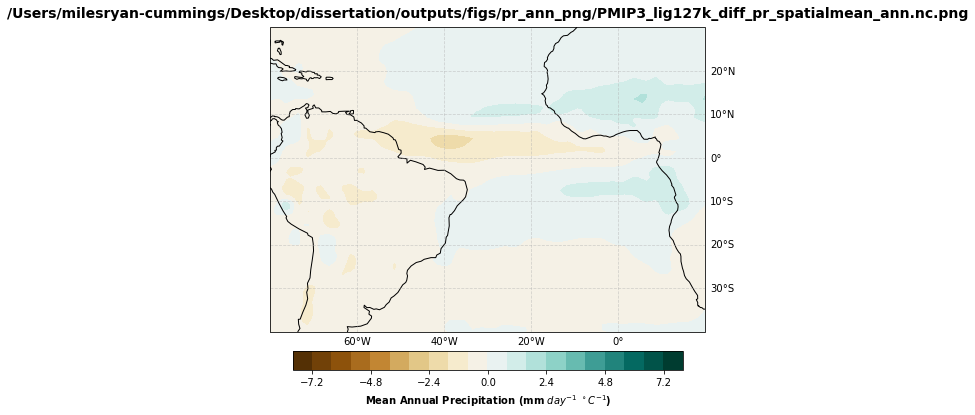

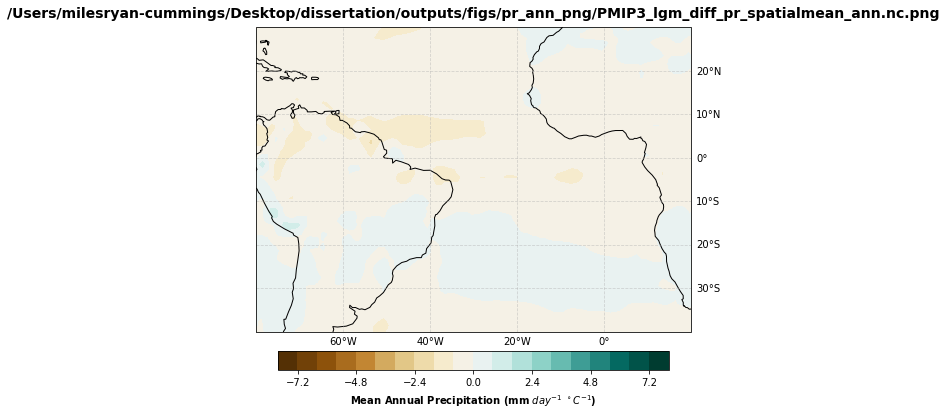

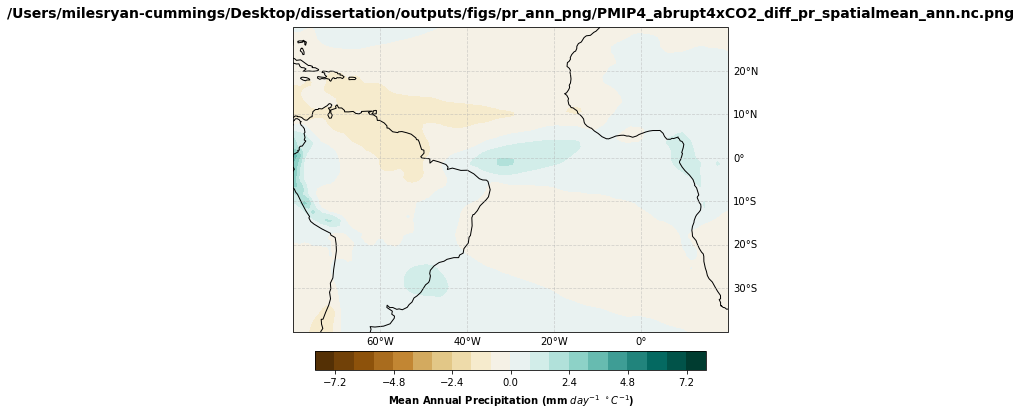

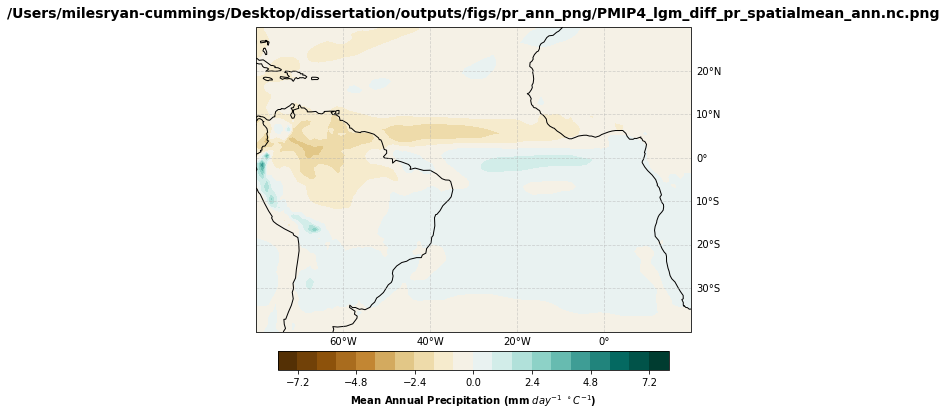

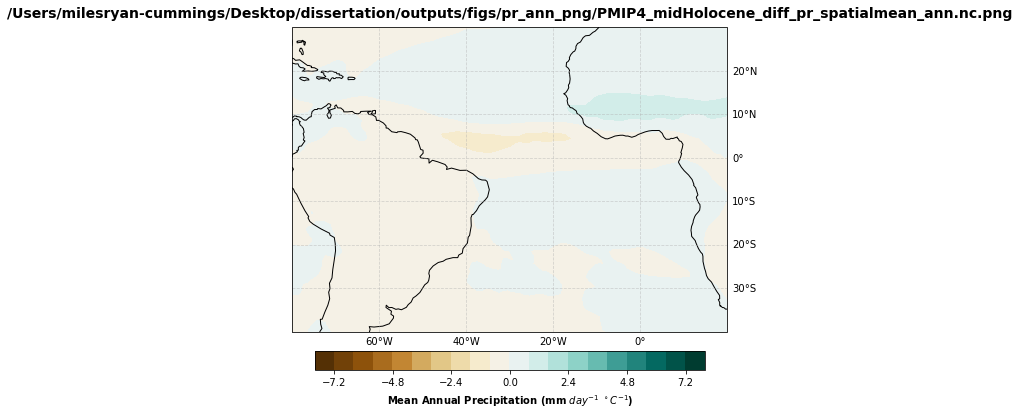

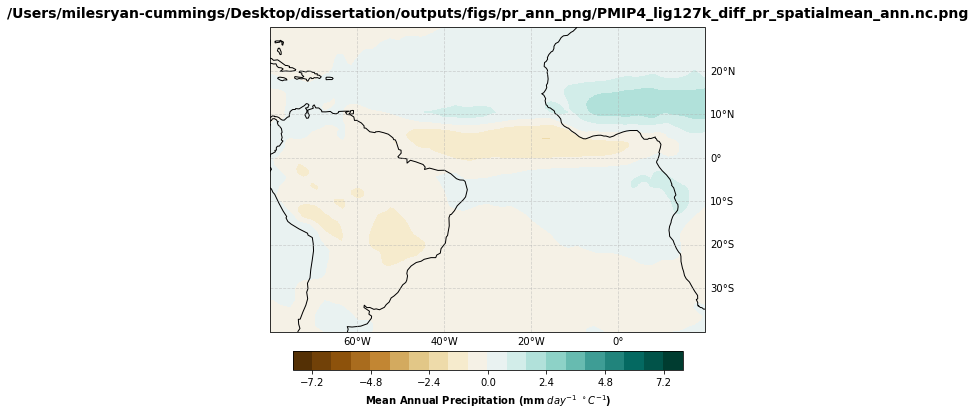

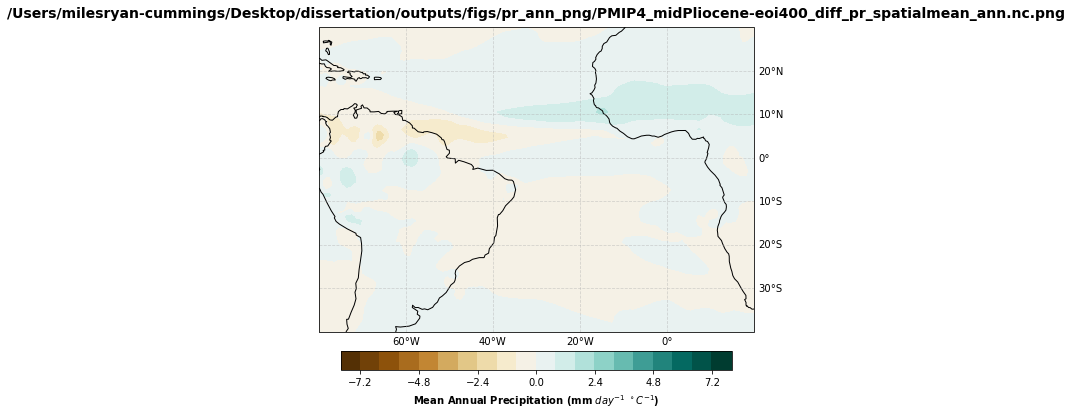

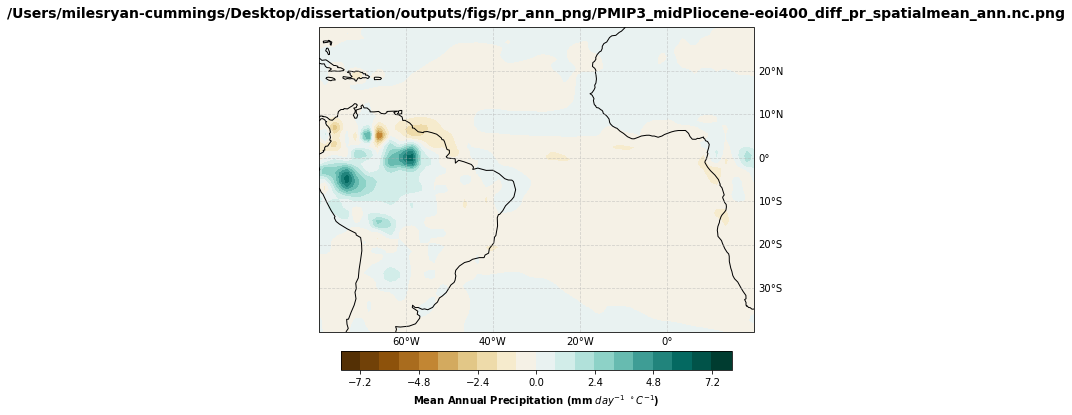

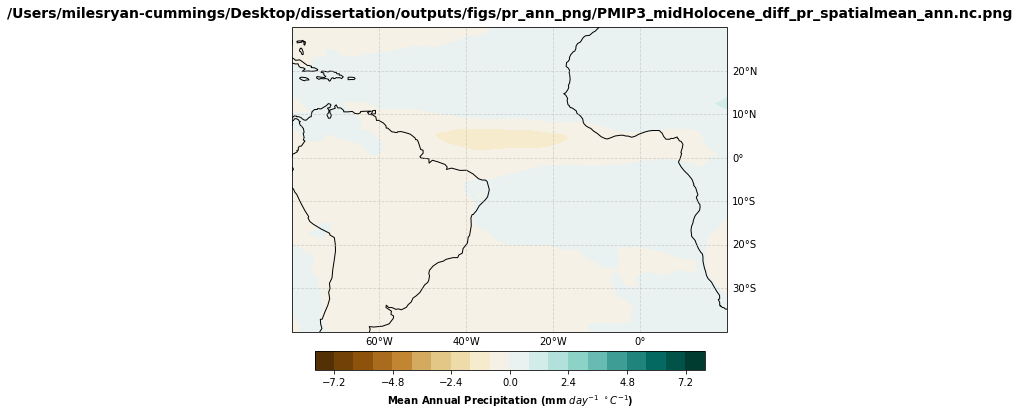

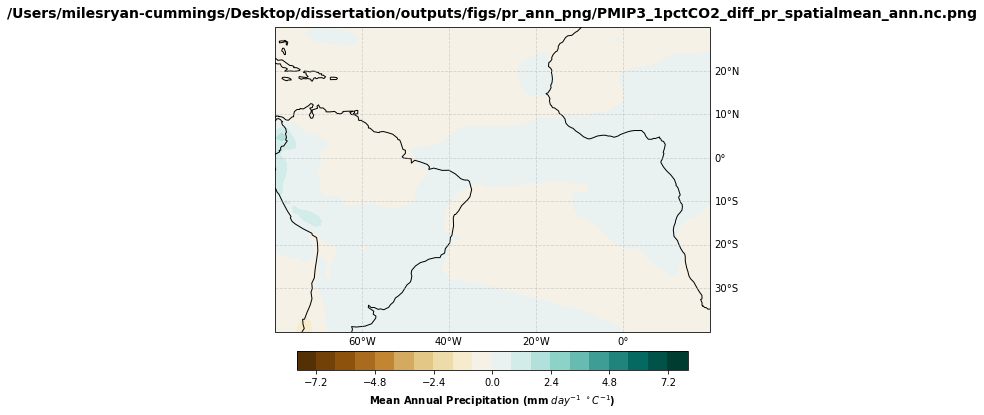

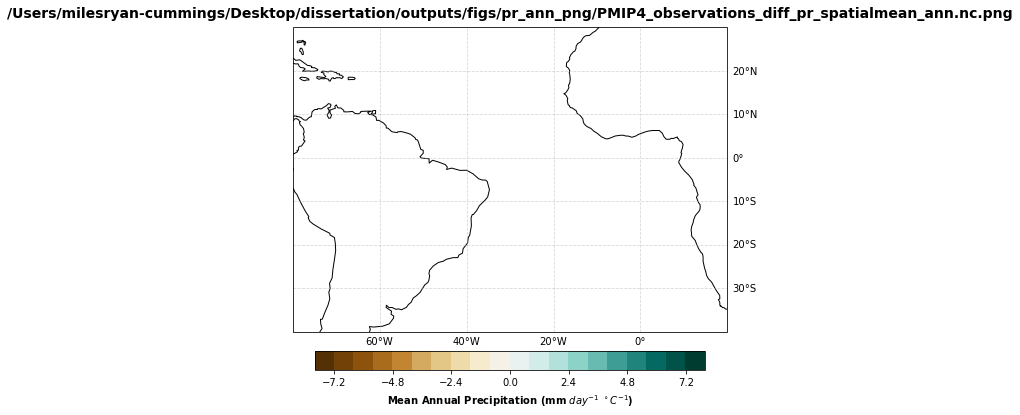

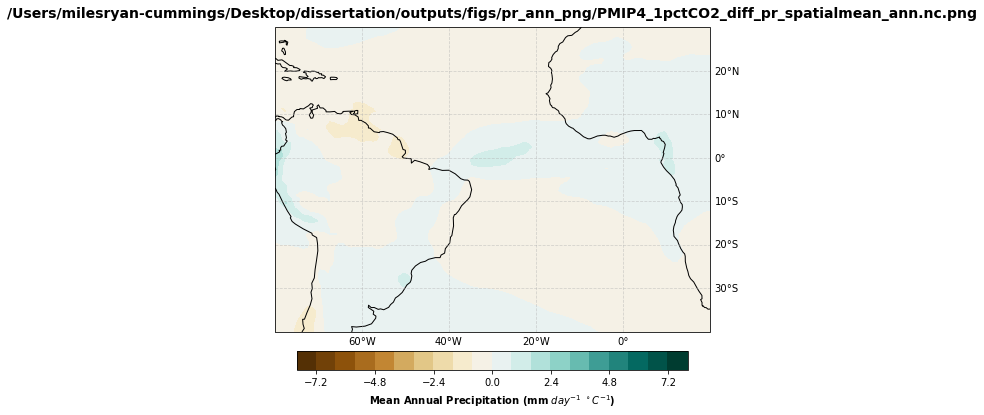

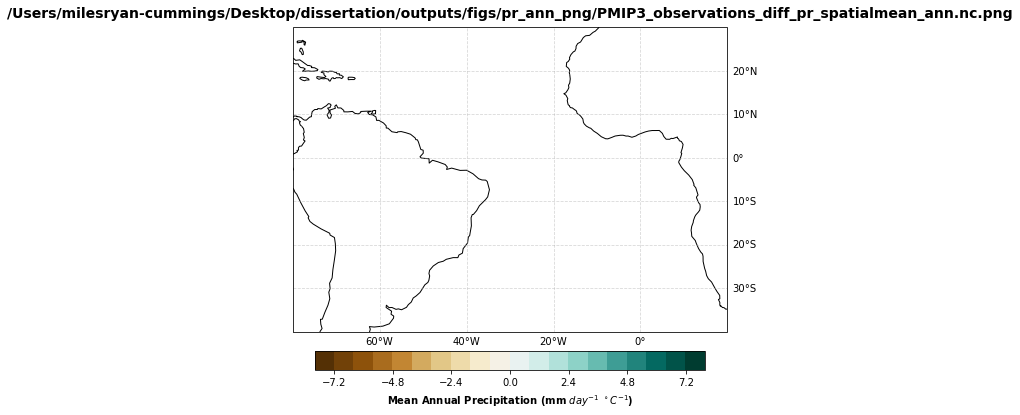

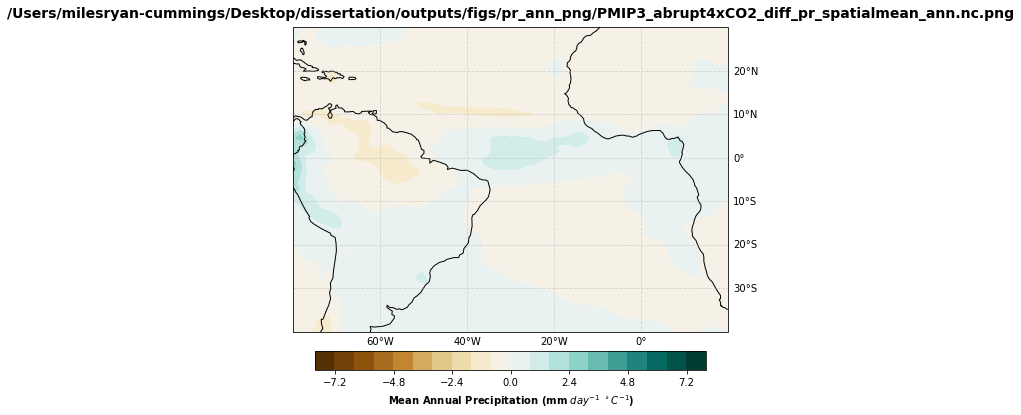

In [4]:
#open datasets
variable_name= 'pr_spatialmean_ann'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_ann/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/pr_ann_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [13]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_djf"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_piControl_pr_spatialmean_djf.nc',
 'PMIP3_lig127k_diff_pr_spatialmean_djf.nc',
 'PMIP4_historical_pr_spatialmean_djf.nc',
 'PMIP3_lgm_diff_pr_spatialmean_djf.nc',
 'PMIP4_abrupt4xCO2_diff_pr_spatialmean_djf.nc',
 'PMIP4_midHolocene_diff_pr_spatialmean_djf.nc',
 'PMIP4_lgm_diff_pr_spatialmean_djf.nc',
 'PMIP3_historical_pr_spatialmean_djf.nc',
 'PMIP4_midPliocene-eoi400_diff_pr_spatialmean_djf.nc',
 'PMIP4_lig127k_diff_pr_spatialmean_djf.nc',
 'PMIP3_midPliocene-eoi400_diff_pr_spatialmean_djf.nc',
 'PMIP3_1pctCO2_diff_pr_spatialmean_djf.nc',
 'PMIP3_midHolocene_diff_pr_spatialmean_djf.nc',
 'PMIP4_piControl_pr_spatialmean_djf.nc',
 'PMIP4_observations_diff_pr_spatialmean_djf.nc',
 'PMIP3_observations_diff_pr_spatialmean_djf.nc',
 'PMIP4_1pctCO2_diff_pr_spatialmean_djf.nc',
 'PMIP3_abrupt4xCO2_diff_pr_spatialmean_djf.nc']

In [14]:

def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-7,7]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    #cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    #plt.colorbar(fig,cax=cax, extend='both', **kw)   
    #cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    #cb.set_label(label='Precipitation Bias (mm $day^{-1}$)', size=19)   
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning

masked_array(
  data=[[0.10527629, 0.10559245, 0.10582178, ..., 0.10505944, 0.10508503,
         0.10527629],
        [0.1237894 , 0.12519242, 0.1265481 , ..., 0.12191206, 0.12268094,
         0.1237894 ],
        [0.1515243 , 0.15493261, 0.15875596, ..., 0.14658819, 0.14870404,
         0.1515243 ],
        ...,
        [0.41031829, 0.4077667 , 0.40594931, ..., 0.41401178, 0.41238434,
         0.41031829],
        [0.41437624, 0.41262439, 0.41198751, ..., 0.41533489, 0.41528462,
         0.41437624],
        [0.36976026, 0.36922764, 0.36915654, ..., 0.36976749, 0.36995502,
         0.36976026]],
  mask=False,
  fill_value=1e+20)

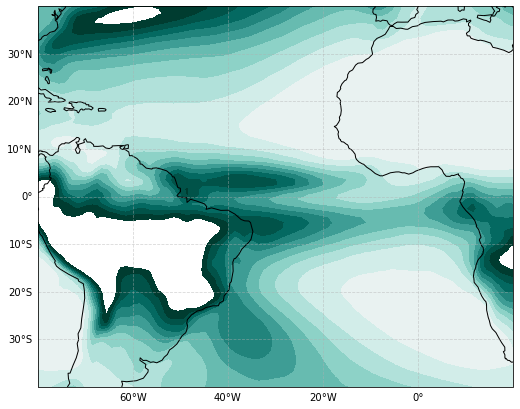

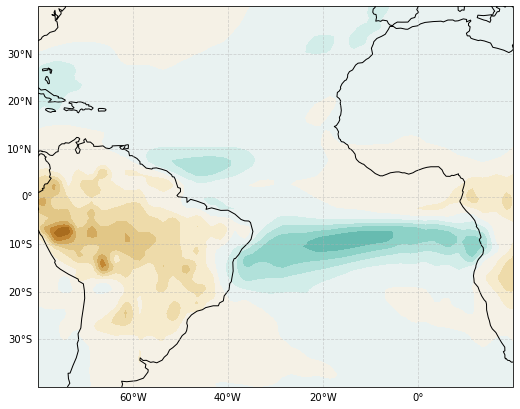

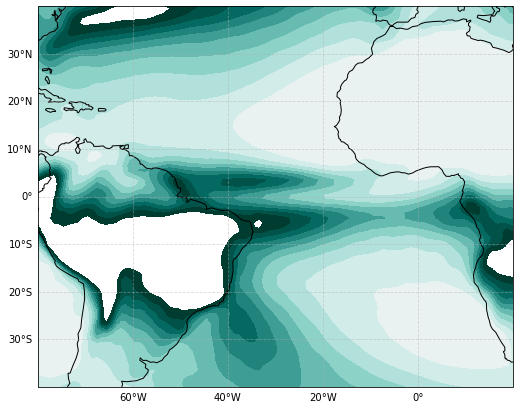

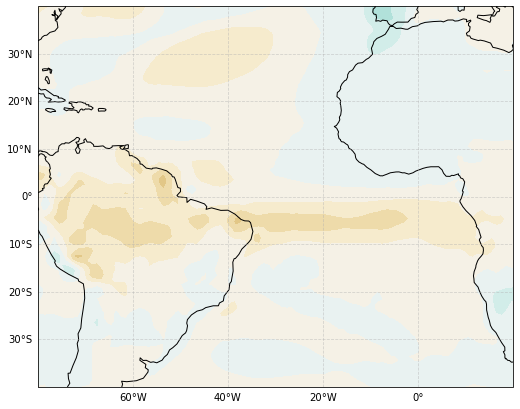

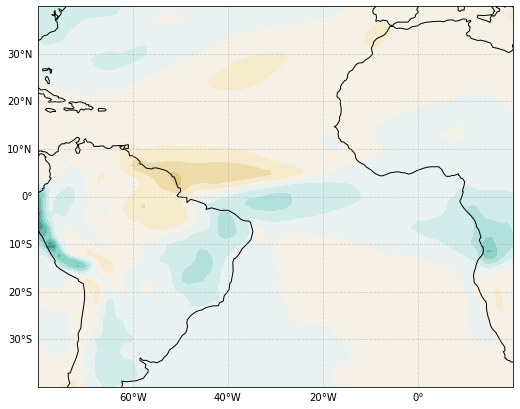

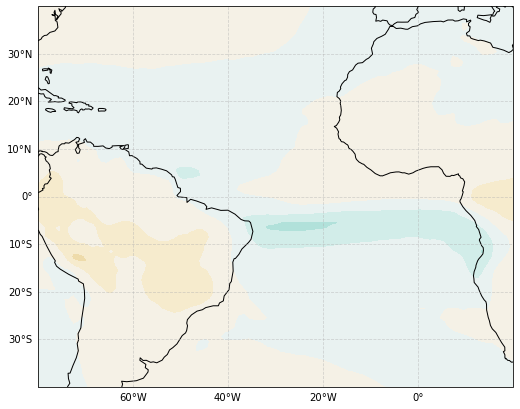

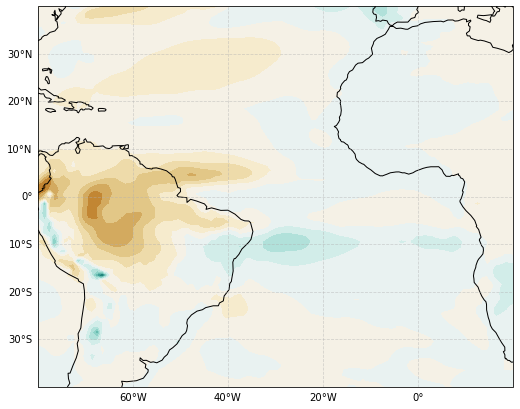

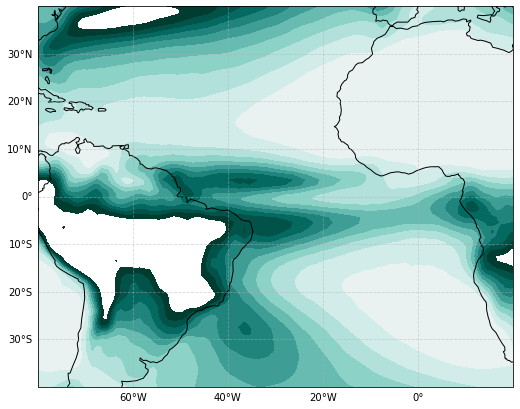

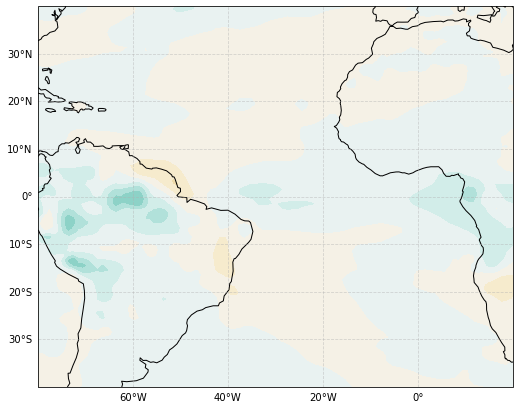

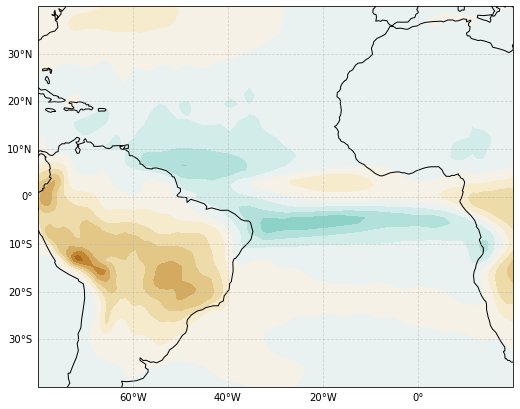

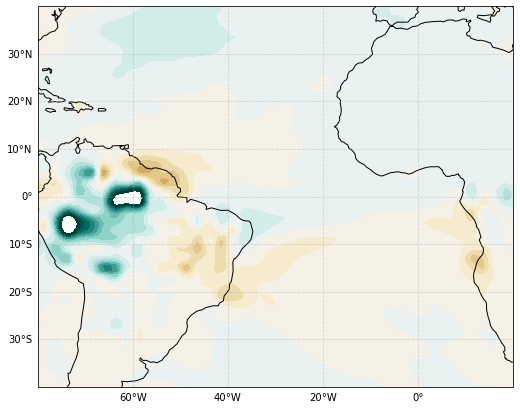

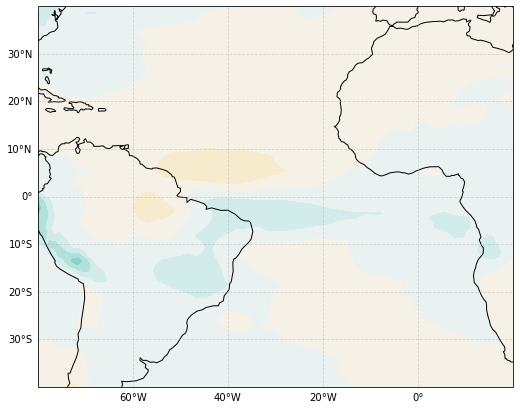

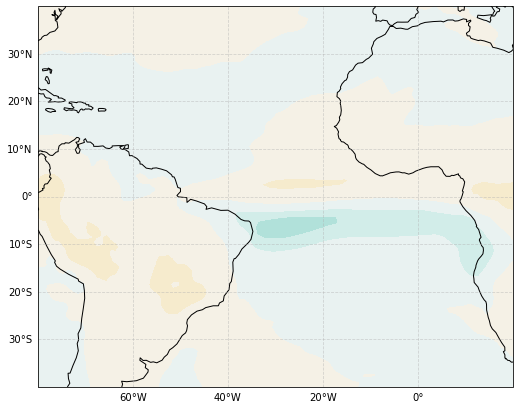

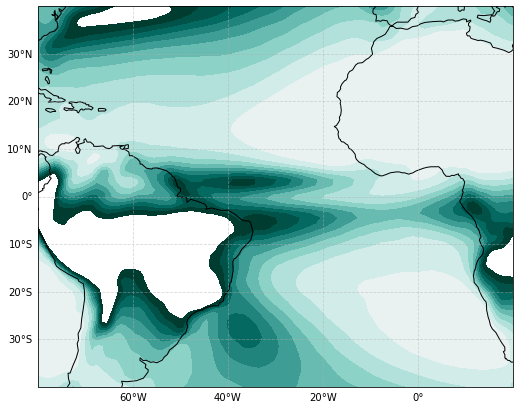

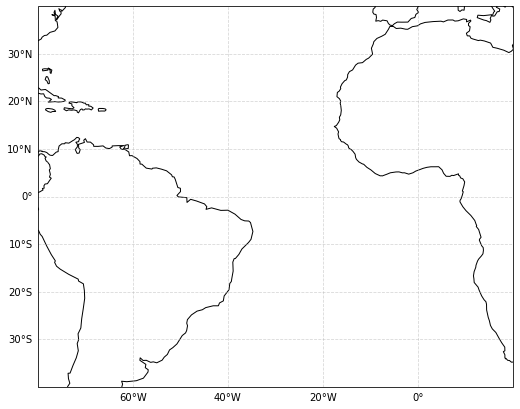

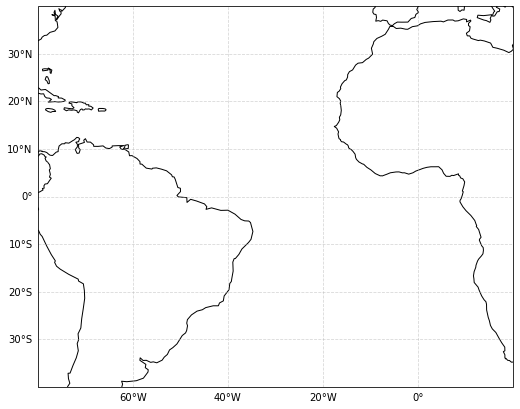

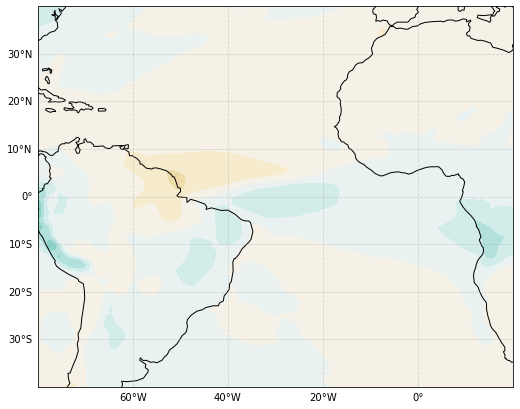

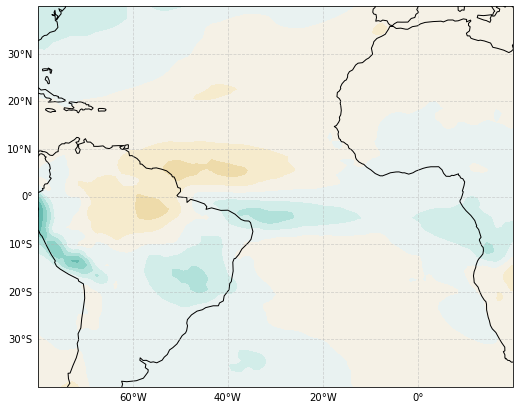

In [15]:
#open datasets
variable_name= 'pr_spatialmean_djf'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_djf/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/pr_djf_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [6]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_jja"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_abrupt4xCO2_diff_pr_spatialmean_jja.nc',
 'PMIP3_lig127k_diff_pr_spatialmean_jja.nc',
 'PMIP3_piControl_pr_spatialmean_jja.nc',
 'PMIP3_lgm_diff_pr_spatialmean_jja.nc',
 'PMIP4_historical_pr_spatialmean_jja.nc',
 'PMIP3_historical_pr_spatialmean_jja.nc',
 'PMIP4_lig127k_diff_pr_spatialmean_jja.nc',
 'PMIP4_midPliocene-eoi400_diff_pr_spatialmean_jja.nc',
 'PMIP4_lgm_diff_pr_spatialmean_jja.nc',
 'PMIP4_midHolocene_diff_pr_spatialmean_jja.nc',
 'PMIP4_piControl_pr_spatialmean_jja.nc',
 'PMIP4_observations_diff_pr_spatialmean_jja.nc',
 'PMIP3_midPliocene-eoi400_diff_pr_spatialmean_jja.nc',
 'PMIP3_1pctCO2_diff_pr_spatialmean_jja.nc',
 'PMIP3_midHolocene_diff_pr_spatialmean_jja.nc',
 'PMIP3_observations_diff_pr_spatialmean_jja.nc',
 'PMIP4_1pctCO2_diff_pr_spatialmean_jja.nc',
 'PMIP3_abrupt4xCO2_diff_pr_spatialmean_jja.nc']

In [11]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-7,7]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    plt.colorbar(fig,cax=cax, extend='both', **kw)   
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='Change in Precipitation (mm $day^{-1}$)', size=19)
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDepre

masked_array(
  data=[[0.08440852, 0.08466057, 0.08491759, ..., 0.08376697, 0.08410267,
         0.08440852],
        [0.10733574, 0.10899003, 0.11058938, ..., 0.10390517, 0.10561866,
         0.10733574],
        [0.15573186, 0.16069546, 0.1656722 , ..., 0.14630918, 0.1508635 ,
         0.15573186],
        ...,
        [0.33071204, 0.33104048, 0.3305761 , ..., 0.33005734, 0.33028116,
         0.33071204],
        [0.29827514, 0.29818432, 0.29813866, ..., 0.29757737, 0.29802174,
         0.29827514],
        [0.2529182 , 0.25301425, 0.25321788, ..., 0.2527822 , 0.25283665,
         0.2529182 ]],
  mask=False,
  fill_value=1e+20)

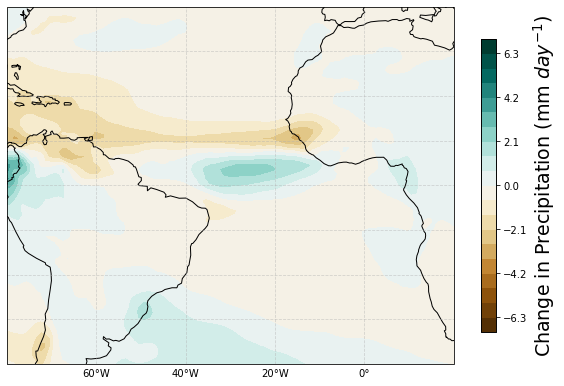

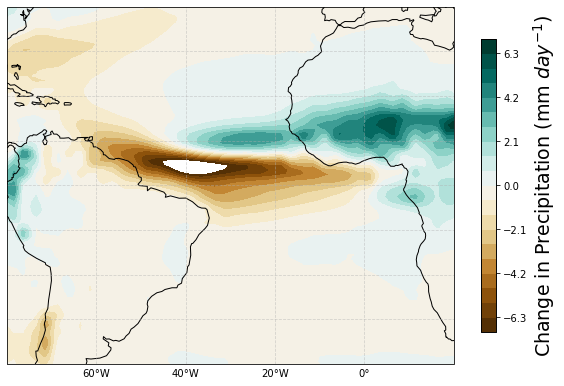

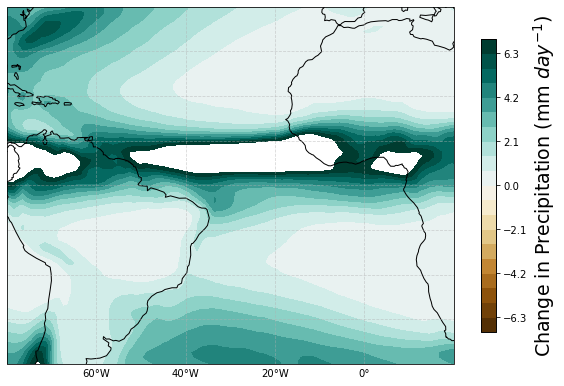

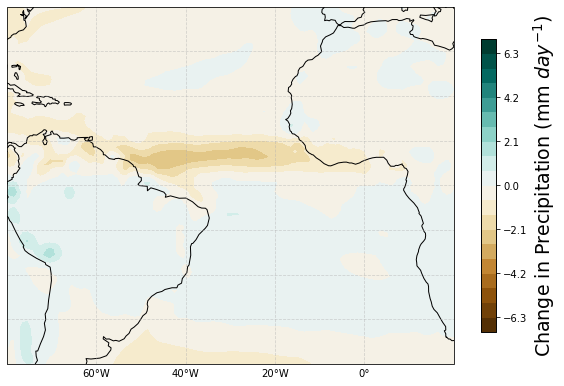

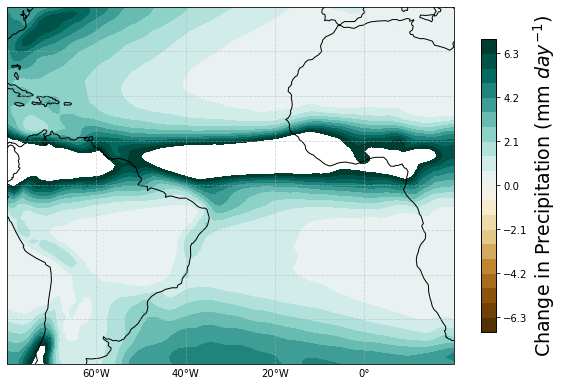

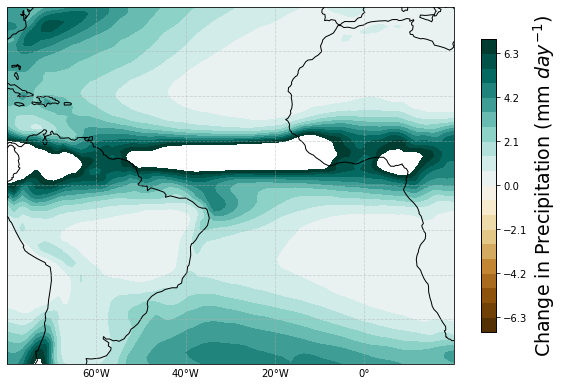

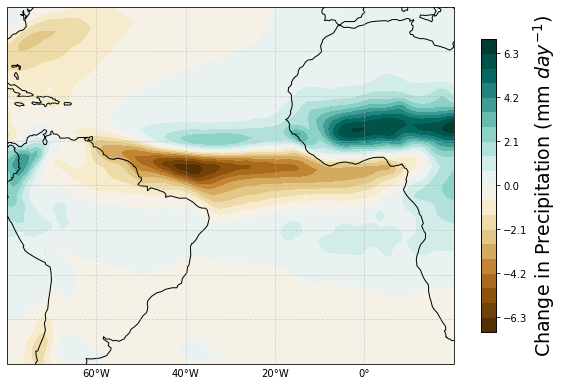

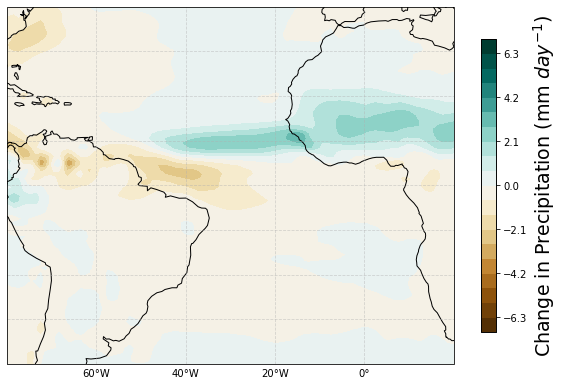

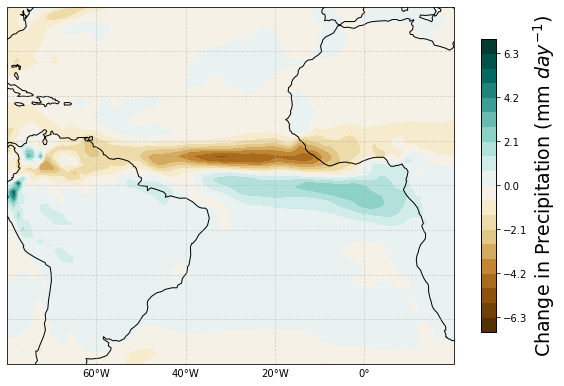

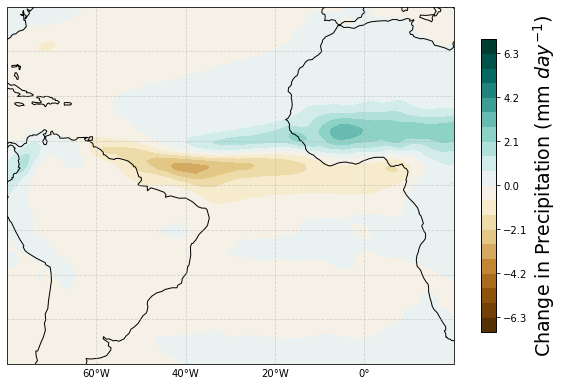

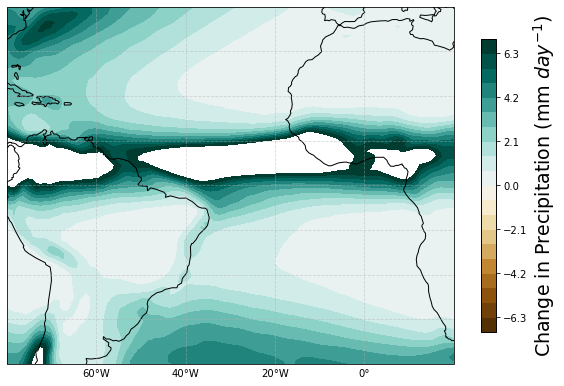

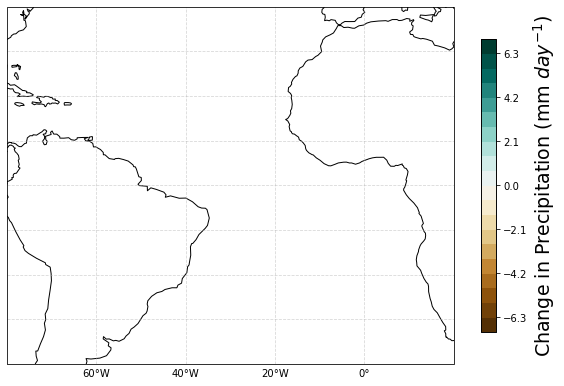

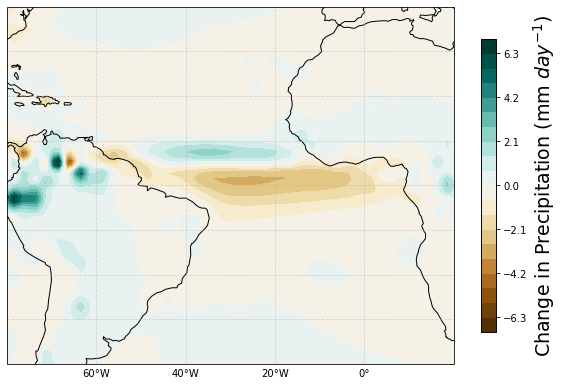

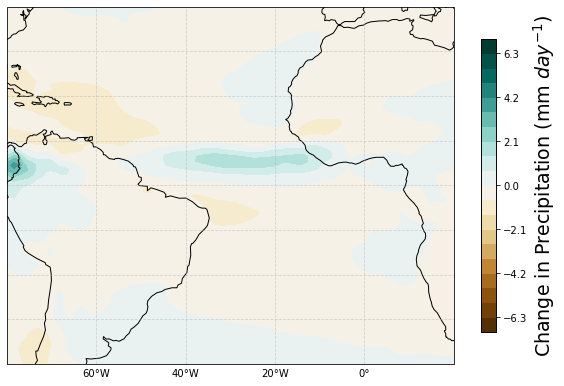

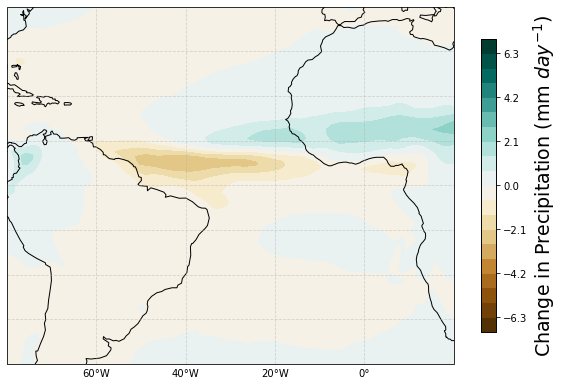

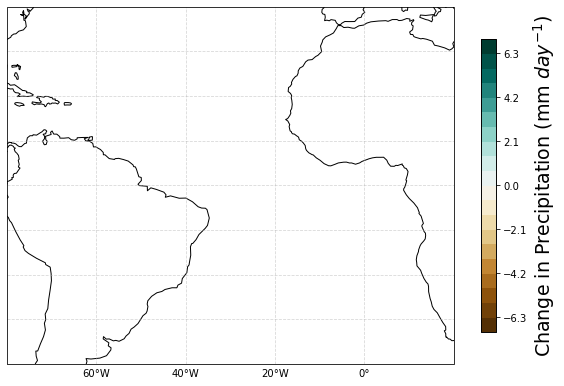

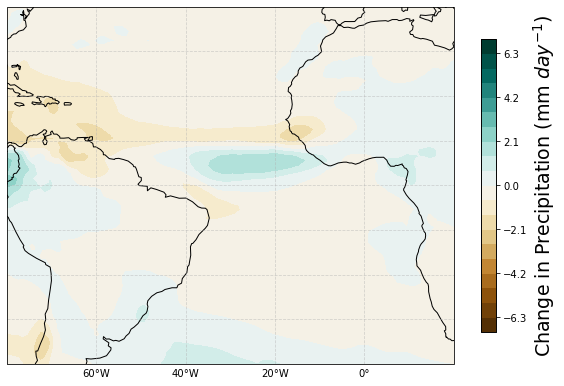

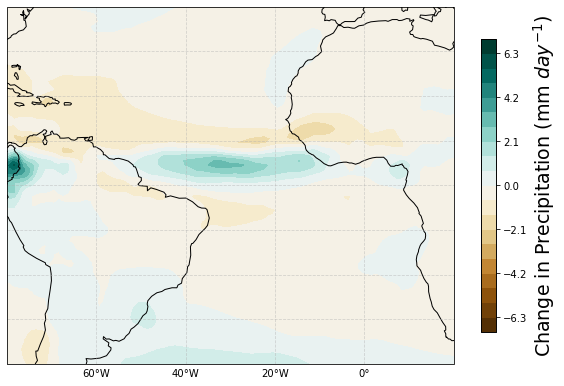

In [12]:
#open datasets
variable_name= 'pr_spatialmean_jja'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_jja/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/pr_jja_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot